# Traffic Light Image Detection


*   Installing dataset
*   Getting bounding boxes using yolo11
*   HSV Classification
*   Integrating and testing

## Installing the Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
import os
import shutil
import json
import cv2
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import pandas as pd
from torch.utils.data import Dataset, DataLoader


In [ ]:
rf = Roboflow(api_key="LseoUu3wNCQP6GR4YrCR")
project1 = rf.workspace("wawan-pradana").project("cinta_v2")
dataset1 = project1.version(1).download("yolov11")

## Training for getting bounding boxes on test images

In [ ]:
pip install -U ultralytics

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")  # This will auto-download if not found

In [ ]:
model.train(data='/content/cinTA_v2-1/data.yaml', epochs=15, imgsz=640)

Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/cinTA_v2-1/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

train: Scanning /content/cinTA_v2-1/train/labels.cache... 2097 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2097/2097 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/cinTA_v2-1/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      2.48G      1.569      3.008      1.459          2        640: 100%|██████████| 132/132 [00:46<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.47it/s]

                   all        200        272      0.408      0.523      0.422      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      2.86G      1.529      2.262      1.385          2        640: 100%|██████████| 132/132 [00:45<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]

                   all        200        272      0.369      0.458      0.457      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      2.86G       1.53        1.9      1.382          0        640: 100%|██████████| 132/132 [00:39<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]


                   all        200        272      0.703      0.708      0.733      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      2.86G      1.514      1.552      1.369          4        640: 100%|██████████| 132/132 [00:42<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]

                   all        200        272      0.874      0.791      0.866      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      2.86G      1.481      1.414       1.34          2        640: 100%|██████████| 132/132 [00:38<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.10it/s]

                   all        200        272      0.913      0.752      0.844      0.386


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      2.86G      1.393      1.189       1.32          1        640: 100%|██████████| 132/132 [00:37<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        200        272      0.919       0.85      0.895      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      2.86G      1.374      1.063      1.298          1        640: 100%|██████████| 132/132 [00:35<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        200        272      0.916      0.821      0.939       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      2.86G      1.365      1.008      1.278          1        640: 100%|██████████| 132/132 [00:34<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]

                   all        200        272      0.952      0.875       0.95      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      2.86G      1.343     0.9372      1.276          1        640: 100%|██████████| 132/132 [00:35<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]


                   all        200        272      0.913      0.893      0.953      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      2.86G      1.296     0.8707      1.243          1        640: 100%|██████████| 132/132 [00:35<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]

                   all        200        272       0.93      0.915      0.962      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      2.86G       1.28     0.8276       1.23          2        640: 100%|██████████| 132/132 [00:36<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.62it/s]

                   all        200        272      0.927      0.945      0.972      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      2.86G      1.249     0.7952      1.205          1        640: 100%|██████████| 132/132 [00:36<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.71it/s]

                   all        200        272      0.925      0.942      0.975      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      2.87G      1.222     0.7336      1.197          1        640: 100%|██████████| 132/132 [00:36<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.78it/s]

                   all        200        272      0.971      0.944      0.985      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      2.87G      1.223     0.7019      1.188          1        640: 100%|██████████| 132/132 [00:36<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.57it/s]

                   all        200        272      0.979      0.968      0.983      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      2.87G      1.174     0.6965      1.165          1        640: 100%|██████████| 132/132 [00:36<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.73it/s]

                   all        200        272      0.979      0.964      0.984      0.536



15 epochs completed in 0.172 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


                   all        200        272      0.976      0.964      0.984      0.536
                 green         69         92      0.989      0.946      0.973      0.549
                   red        111        155       0.98      0.947      0.985      0.528
                yellow         24         25      0.961          1      0.995      0.531
Speed: 0.4ms preprocess, 3.9ms inference, 0.0ms loss, 8.6ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78def5669650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
from google.colab import files

files.download('/content/runs/detect/train3/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Preprocessing training dataset for classification

In [ ]:
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt

test_image_dir = "/content/cinTA_v2-1/test/images"
test_label_dir = "/content/cinTA_v2-1/test/labels"

test_image_paths = sorted(glob(os.path.join(test_image_dir, "*")))
test_label_paths = sorted(glob(os.path.join(test_label_dir, "*")))

num_images = min(5, len(test_image_paths))
for i in range(num_images):
    image_path = test_image_paths[i]
    label_path = test_label_paths[i]

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape  # Get image dimensions

    labels = []
    with open(label_path, 'r') as f:
        for line in f:
            data_line = list(map(float, line.strip().split()))
            labels.append(data_line)

    for label in labels:
        color, x_center, y_center, box_width, box_height = label[:5]

        # Convert YOLO format to pixel coordinates
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Draw bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Compute area
        area = abs((x2 - x1) * (y2 - y1))
        print(f"Bounding Box Area: {area}")
        print(f"height: {y1-y2} , width:  {x1-x2}")

    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [ ]:
import os
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

def load_cropped_light_data(image_dir, label_dir, crop_size=(64, 64)):
    image_files = sorted(os.listdir(image_dir))
    label_files = sorted(os.listdir(label_dir))

    if len(image_files) != len(label_files):
        raise ValueError("Number of images and labels do not match.")

    for image_file in image_files:
        if not image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            raise ValueError(f"Image {image_file} does not have a valid extension.")
    for label_file in label_files:
        if not label_file.lower().endswith('.txt'):
            raise ValueError(f"Label {label_file} does not have a valid extension.")

    cropped_images = []
    colors = []
    for image_file, label_file in zip(image_files, label_files):
        image_path = os.path.join(image_dir, image_file)
        label_path = os.path.join(label_dir, label_file)

        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        h, w, _ = image.shape
        labels = []
        with open(label_path, 'r') as f:
            for line in f:
                data_line = list(map(float, line.strip().split()))
                labels.append(data_line)


        for label in labels:
            color, x_center, y_center, box_width, box_height = label[:5]

            # Convert YOLO format pixel coordinates
            x1_pixel = int((x_center - box_width / 2) * w)
            y1_pixel = int((y_center - box_height / 2) * h)
            x2_pixel = int((x_center + box_width / 2) * w)
            y2_pixel = int((y_center + box_height / 2) * h)

            x1_pixel = max(0, x1_pixel)
            y1_pixel = max(0, y1_pixel)
            x2_pixel = min(w, x2_pixel)
            y2_pixel = min(h, y2_pixel)

            # Crop image
            cropped_img = image[y1_pixel:y2_pixel, x1_pixel:x2_pixel]

            if cropped_img.size == 0 or cropped_img.shape[0] == 0 or cropped_img.shape[1] == 0:
                continue

            resized_img = cv2.resize(cropped_img, crop_size)

            cropped_images.append(resized_img)
            colors.append(int(color))


    return cropped_images, colors

image_dir = "/content/cinTA_v2-1/test/images"
label_dir = "/content/cinTA_v2-1/test/labels"
cropped_images, colors = load_cropped_light_data(image_dir, label_dir, crop_size=(120, 320))


## HSV Classification

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import time
import pandas as pd
import cv2
from sklearn.preprocessing import LabelBinarizer


def hsv_improved_classification(images):

    predicted_labels = []

    for image in images:
        image_eq = image.copy()
        lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
        cl = clahe.apply(l)
        limg = cv2.merge((cl, a, b))
        image_eq = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

        # Convert to HSV
        hsv = cv2.cvtColor(image_eq, cv2.COLOR_RGB2HSV)

        height, width = hsv.shape[:2]
        top_region = hsv[0:height//3, :, :]
        middle_region = hsv[height//3:2*height//3, :, :]
        bottom_region = hsv[2*height//3:, :, :]


        red_mask1 = (hsv[:, :, 0] < 10) & (hsv[:, :, 1] > 100) & (hsv[:, :, 2] > 100)
        red_mask2 = (hsv[:, :, 0] > 170) & (hsv[:, :, 1] > 100) & (hsv[:, :, 2] > 100)
        red_mask = red_mask1 | red_mask2

        yellow_mask = (hsv[:, :, 0] > 20) & (hsv[:, :, 0] < 40) & (hsv[:, :, 1] > 100) & (hsv[:, :, 2] > 100)

        green_mask = (hsv[:, :, 0] > 40) & (hsv[:, :, 0] < 80) & (hsv[:, :, 1] > 100) & (hsv[:, :, 2] > 100)

        red_top = np.sum(red_mask & (np.ones_like(red_mask) * (np.arange(height)[:, np.newaxis] < height//3)))
        red_middle = np.sum(red_mask & (np.ones_like(red_mask) * ((np.arange(height)[:, np.newaxis] >= height//3) & (np.arange(height)[:, np.newaxis] < 2*height//3))))
        red_bottom = np.sum(red_mask & (np.ones_like(red_mask) * (np.arange(height)[:, np.newaxis] >= 2*height//3)))

        yellow_top = np.sum(yellow_mask & (np.ones_like(yellow_mask) * (np.arange(height)[:, np.newaxis] < height//3)))
        yellow_middle = np.sum(yellow_mask & (np.ones_like(yellow_mask) * ((np.arange(height)[:, np.newaxis] >= height//3) & (np.arange(height)[:, np.newaxis] < 2*height//3))))
        yellow_bottom = np.sum(yellow_mask & (np.ones_like(yellow_mask) * (np.arange(height)[:, np.newaxis] >= 2*height//3)))

        green_top = np.sum(green_mask & (np.ones_like(green_mask) * (np.arange(height)[:, np.newaxis] < height//3)))
        green_middle = np.sum(green_mask & (np.ones_like(green_mask) * ((np.arange(height)[:, np.newaxis] >= height//3) & (np.arange(height)[:, np.newaxis] < 2*height//3))))
        green_bottom = np.sum(green_mask & (np.ones_like(green_mask) * (np.arange(height)[:, np.newaxis] >= 2*height//3)))

        red_score = 1.5 * red_top + 0.8 * red_middle + 0.3 * red_bottom
        yellow_score = 0.3 * yellow_top + 1.5 * yellow_middle + 0.3 * yellow_bottom
        green_score = 0.3 * green_top + 0.8 * green_middle + 1.5 * green_bottom

        # Make decision based on weighted scores
        if red_score > yellow_score and red_score > green_score and red_score > 50:
            predicted_labels.append(1)  # Red
        elif yellow_score > red_score and yellow_score > green_score and yellow_score > 50:
            predicted_labels.append(2)  # Yellow
        elif green_score > 50:
            predicted_labels.append(0)  # Green
        else:
            red_pixels = np.sum(red_mask)
            yellow_pixels = np.sum(yellow_mask)
            green_pixels = np.sum(green_mask)

            if red_pixels > yellow_pixels and red_pixels > green_pixels and red_pixels > 20:
                predicted_labels.append(1)  # Red
            elif yellow_pixels > red_pixels and yellow_pixels > green_pixels and yellow_pixels > 20:
                predicted_labels.append(2)  # Yellow
            elif green_pixels > 20:
                predicted_labels.append(0)  # Green
            else:
                top_brightness = np.mean(top_region[:, :, 2])
                middle_brightness = np.mean(middle_region[:, :, 2])
                bottom_brightness = np.mean(bottom_region[:, :, 2])

                if top_brightness > middle_brightness and top_brightness > bottom_brightness:
                    predicted_labels.append(1)  # Red
                elif middle_brightness > top_brightness and middle_brightness > bottom_brightness:
                    predicted_labels.append(2)  # Yellow
                else:
                    predicted_labels.append(0)  # Green

    return np.array(predicted_labels)

def evaluate_and_save_results(true_labels, predicted_labels, student_name, reg_number, images, model=None):

    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    mcc = matthews_corrcoef(true_labels, predicted_labels)
    confusion = confusion_matrix(true_labels, predicted_labels)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"MCC: {mcc}")
    print("Confusion Matrix:\n", confusion)

    results_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'MCC'],
        'Value': [accuracy, precision, recall, f1, mcc]
    })
    results_df.to_excel(f"{student_name}-{reg_number}-results.xlsx", index=False)

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(true_labels)
    y_pred_bin = lb.transform(predicted_labels)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):  # 3 classes
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    colors = ['green', 'red', 'yellow']
    labels = ['Green', 'Red', 'Yellow']
    for i in range(3):
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
                 label=f'ROC curve for {labels[i]} (area = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig(f"{student_name}-{reg_number}-roc_curve.jpeg", dpi=300, bbox_inches='tight')


    # Visualize predictions
    plt.figure(figsize=(15, 10))
    class_names = ['Green', 'Red', 'Yellow']
    for i in range(min(15, len(images))):
        plt.subplot(3, 5, i + 1)
        plt.imshow(images[i])
        color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}",
                 color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"{student_name}-{reg_number}-predictions.jpeg", dpi=300, bbox_inches='tight')

    # Testing time
    testing_times = []
    for image in images[:100]:
        start_time = time.time()
        hsv_improved_classification(np.array([image]))
        end_time = time.time()
        testing_times.append(end_time - start_time)

    average_testing_time = np.mean(testing_times)
    print(f"Average Testing Time: {average_testing_time} seconds")

    testing_time_df = pd.DataFrame({'Testing Time (seconds)': testing_times})
    testing_time_df.to_excel(f"{student_name}-{reg_number}-testing_time.xlsx", index=False)

    return average_testing_time


student_name = "221IT066"
reg_number = "221IT038"

train_images, test_images, train_labels, test_labels = train_test_split(cropped_images, colors, test_size=0.2, random_state=42)

print("\n========== HSV-based Method ==========")
start_train_hsv = time.time()
predicted_labels_train_hsv = hsv_improved_classification(train_images[:10])
end_train_hsv = time.time()
training_time_hsv = end_train_hsv - start_train_hsv

print(f"HSV Method Training Time: {training_time_hsv} seconds")

# Testing with HSV
predicted_labels_hsv = hsv_improved_classification(test_images)
print("\nHSV Method Results:")
avg_test_time_hsv = evaluate_and_save_results(
    test_labels, predicted_labels_hsv,
    f"{student_name}_hsv", reg_number, test_images
)

# Save training times
training_times_df = pd.DataFrame({
    'Method': ['HSV'],
    'Training Time (seconds)': [training_time_hsv]
})
training_times_df.to_excel(f"{student_name}-{reg_number}-training_times.xlsx", index=False)

methods_df = pd.DataFrame({
    'Method': ['HSV'],
    'Accuracy': [
        accuracy_score(test_labels, predicted_labels_hsv)
    ],
    'F1 Score': [
        f1_score(test_labels, predicted_labels_hsv, average='weighted')
    ],
    'Training Time (s)': [training_time_hsv],
    'Testing Time (s)': [avg_test_time_hsv]
})

print("\nMetrics:")
print(methods_df)
methods_df.to_excel(f"{student_name}-{reg_number}-metrics.xlsx", index=False)


## Integrating the model and classification for the test images

Starting Traffic Light Classification with YOLO + HSV...
Test image directory: /content/cinTA_v2-1/test/images
Test label directory: /content/cinTA_v2-1/test/labels
Classification completed in 0.3477 seconds
Processed 137 images
Accuracy: 0.8540
Precision: 0.8790
Recall: 0.8540
F1-score: 0.8499
MCC: 0.7530
Confusion Matrix:
[[39 18  0]
 [ 1 70  0]
 [ 0  1  8]]


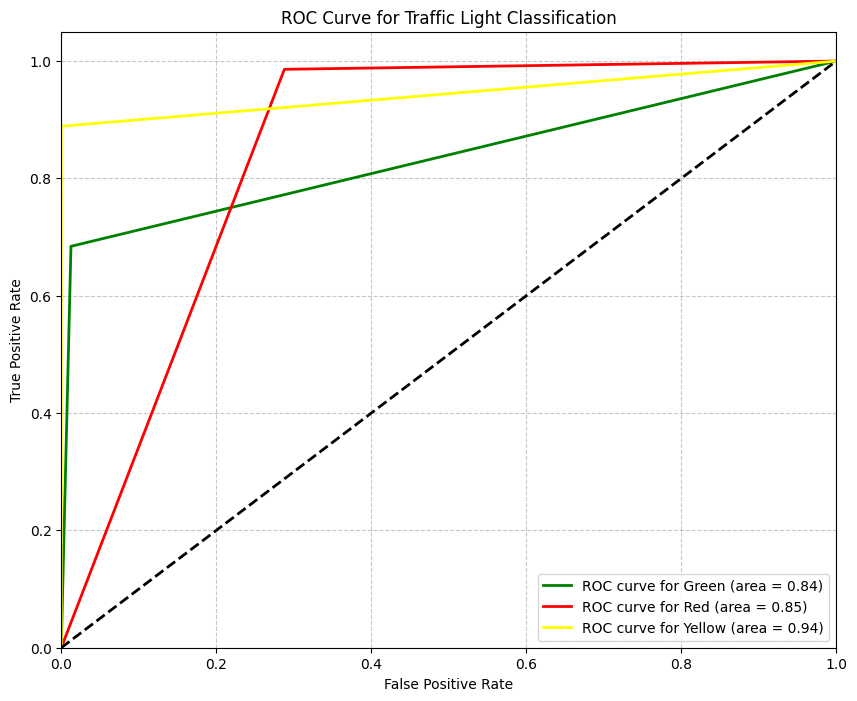

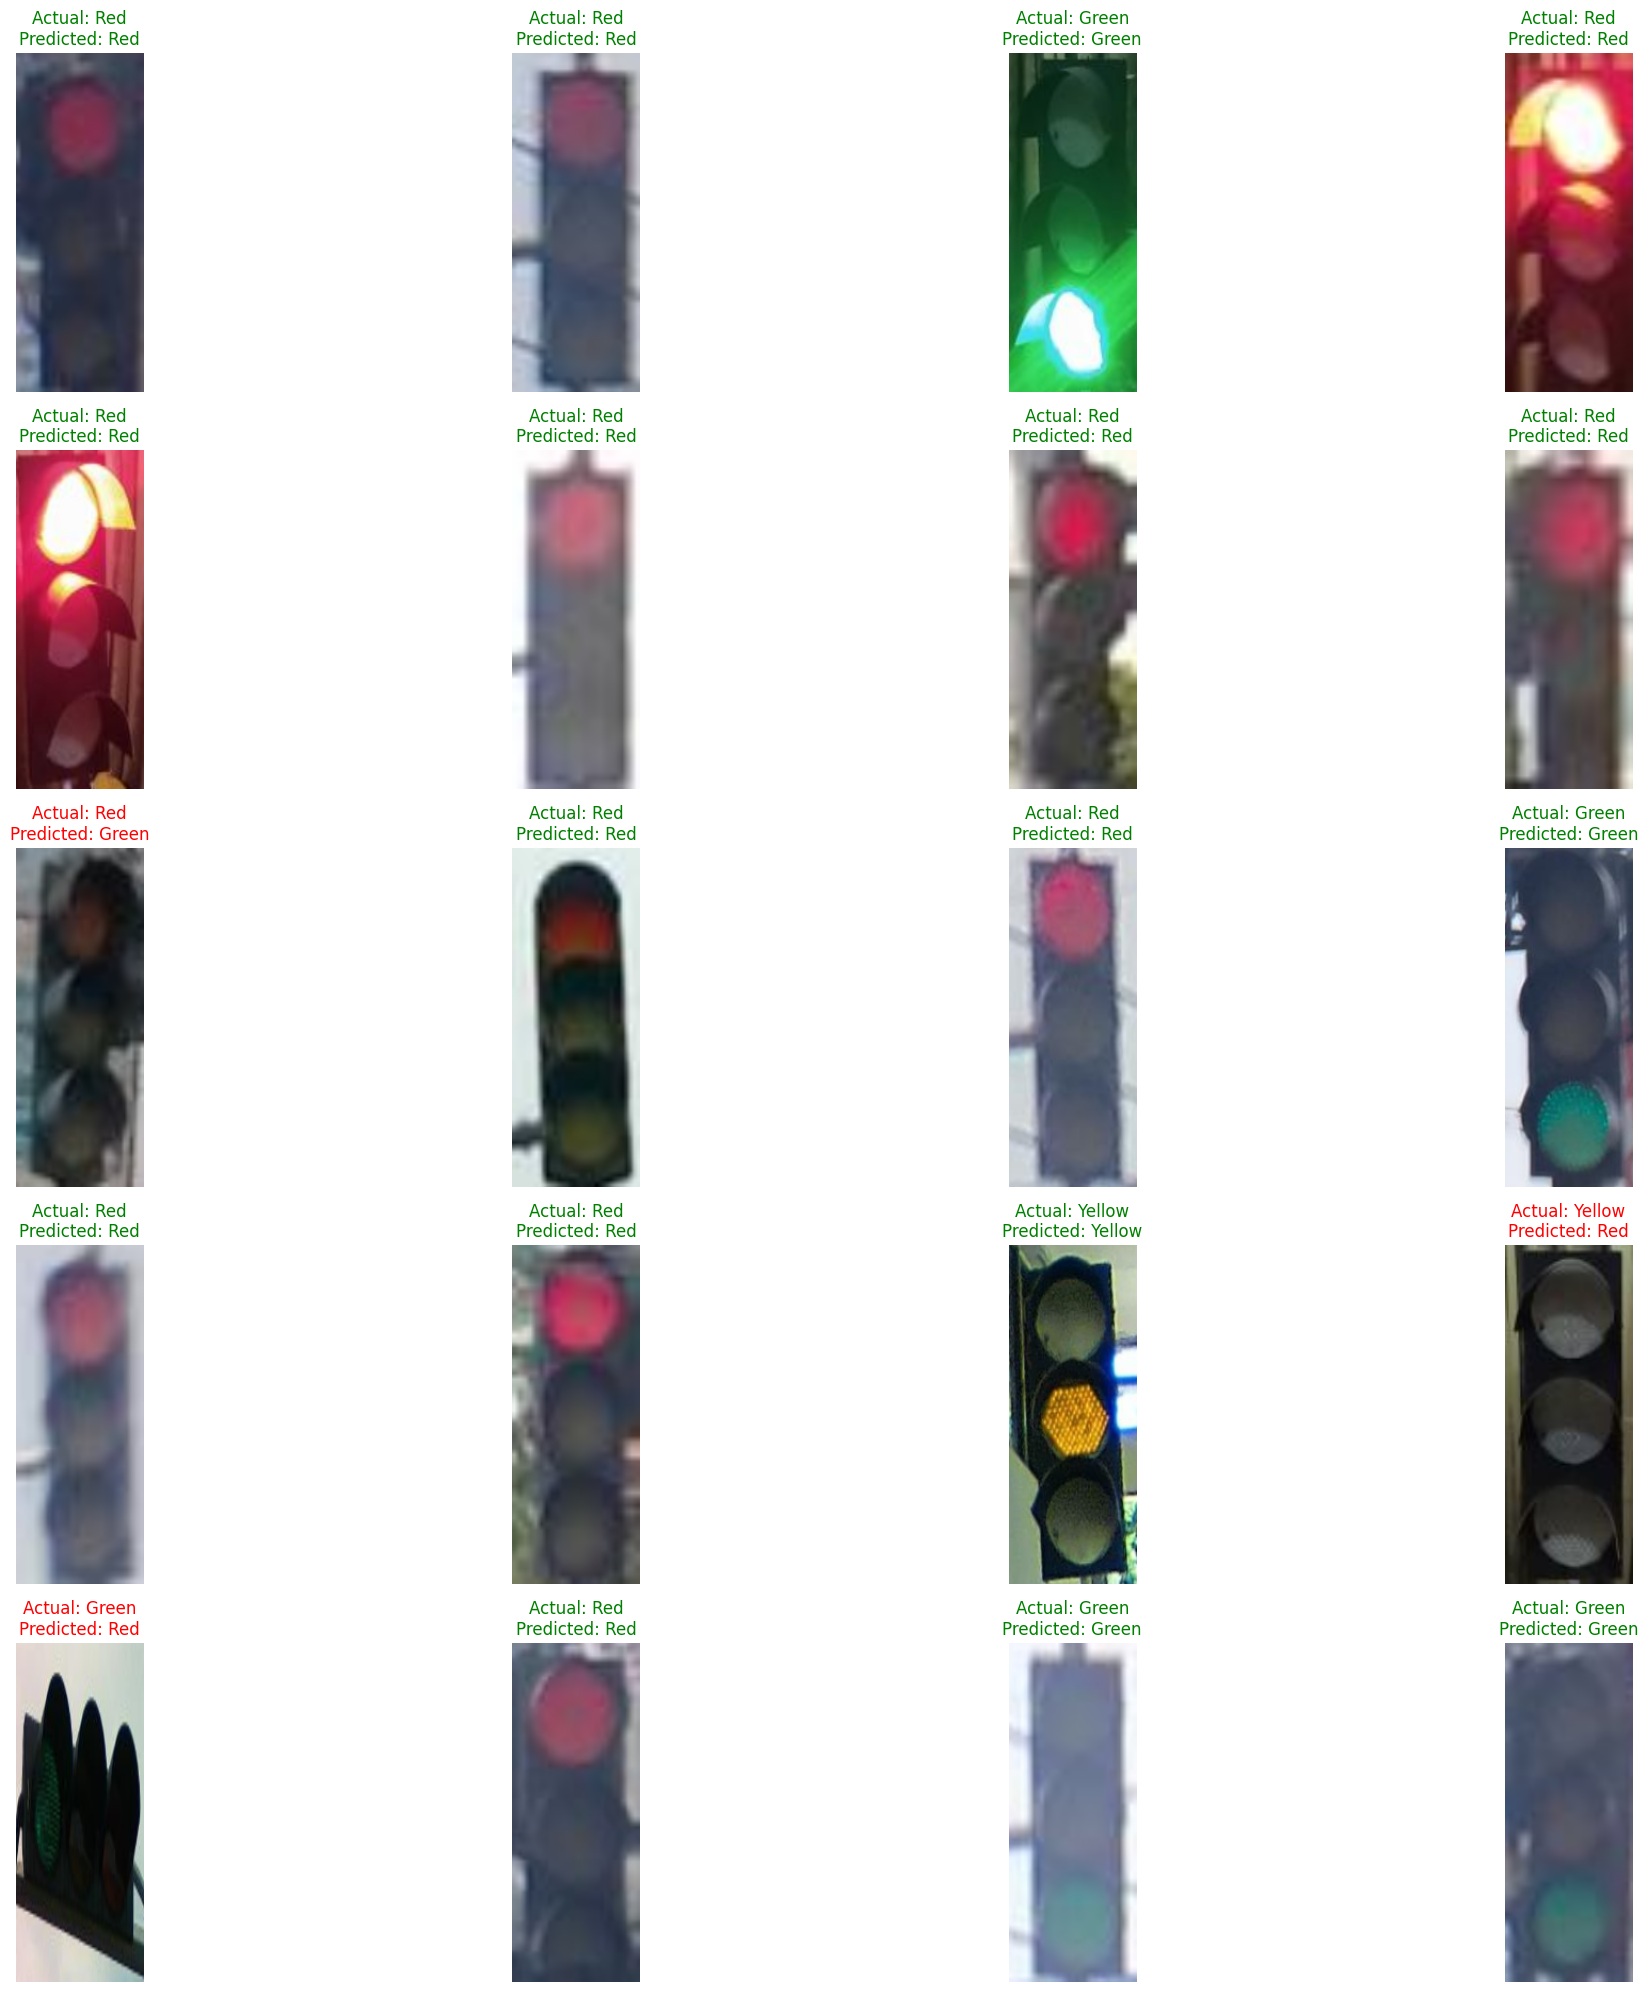

Summary: 117/137 correct predictions (85.40%)


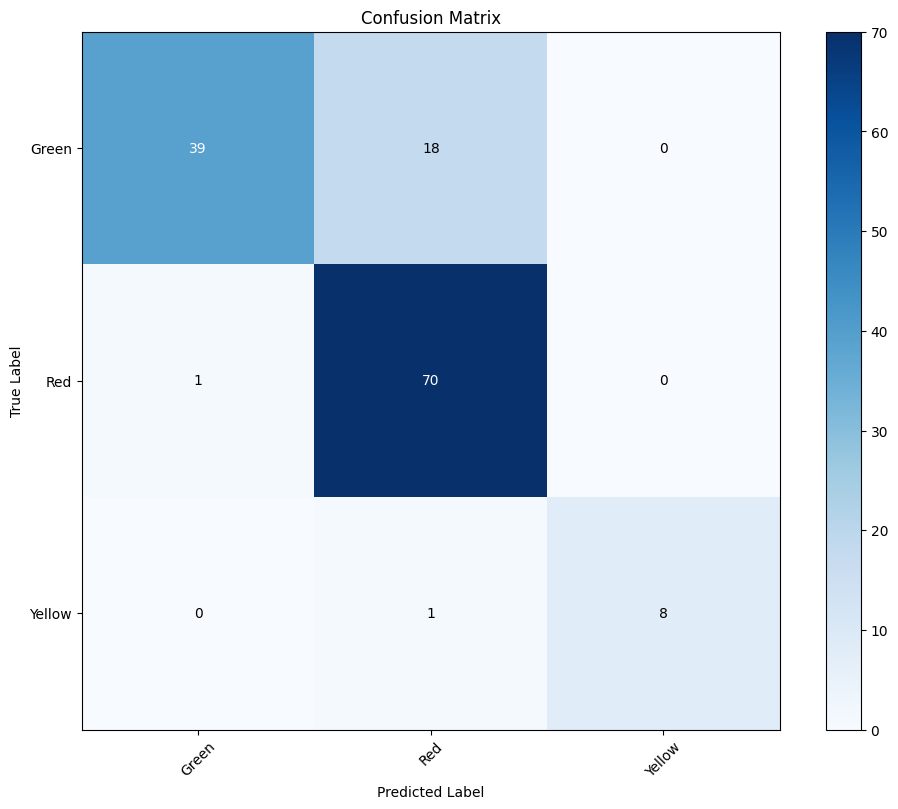

In [6]:
from ultralytics import YOLO
model = YOLO("/content/best.pt")

import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from glob import glob
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def load_yolo_cropped_data(image_dir, label_dir, crop_size=(120, 320)):
    test_image_paths = glob(os.path.join(image_dir, "*"))
    cropped_images = []
    colors = []
    label_image_path = glob(os.path.join(label_dir, "*"))

    for image_path in test_image_paths:
      results = model(image_path, verbose=False)
      img = cv2.imread(image_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      h, w, _ = img.shape

      for result in results:
          boxes = result.boxes.xyxy.cpu().numpy()
          class_ids = result.boxes.cls.cpu().numpy().astype(int)
          for box in boxes:
              x1, y1, x2, y2 = box.astype(int)
              x1 = max(0, x1)
              y1 = max(0, y1)
              x2 = min(w, x2)
              y2 = min(h, y2)
              cropped_img = img[y1:y2, x1:x2]

              if cropped_img.size == 0 or cropped_img.shape[0] == 0 or cropped_img.shape[1] == 0:
                  continue

              resized_img = cv2.resize(cropped_img, crop_size)

              cropped_images.append(resized_img)
              colors.append(np.argmax(np.bincount(class_ids)))

    return cropped_images, colors


def evaluate_and_save_results(true_labels, predicted_labels, student_name, reg_number):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    mcc = matthews_corrcoef(true_labels, predicted_labels)
    confusion = confusion_matrix(true_labels, predicted_labels)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"MCC: {mcc:.4f}")
    print("Confusion Matrix:")
    print(confusion)

    results_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'MCC'],
        'Value': [accuracy, precision, recall, f1, mcc]
    })
    results_df.to_excel(f"{student_name}-{reg_number}-metrics.xlsx", index=False)

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(true_labels)
    y_pred_bin = lb.transform(predicted_labels)

    # Check if y_true_bin has enough columns before accessing them
    num_classes = y_true_bin.shape[1]  # Get the number of classes

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    plt.figure(figsize=(10, 8))
    colors_plot = ['green', 'red', 'yellow']
    labels = ['Green', 'Red', 'Yellow']

    for i in range(min(num_classes, 3)):  # Iterate up to the number of classes or 3
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=colors_plot[i], lw=2,
                 label=f'ROC curve for {labels[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Traffic Light Classification')
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig(f"{student_name}-{reg_number}-roc_curve.jpeg", dpi=300, bbox_inches='tight')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'mcc': mcc,
        'confusion_matrix': confusion
    }


def classify_and_visualize_test_images(test_image_dir, test_label_dir, student_name, reg_number, num_display=20):

    # Load and crop images using YOLO bounding boxes
    cropped_images, true_labels = load_yolo_cropped_data(
        test_image_dir, test_label_dir
    )

    if not cropped_images:
        print("No valid images found!")
        return

    cropped_images_np = np.array(cropped_images)
    true_labels_np = np.array(true_labels)

    start_time = time.time()
    predicted_labels = hsv_improved_classification(cropped_images_np)
    end_time = time.time()

    print(f"Classification completed in {end_time - start_time:.4f} seconds")
    print(f"Processed {len(cropped_images_np)} images")

    # Save predictions to Excel
    results_df = pd.DataFrame({
        'SI NO': [i for i in range(len(cropped_images))],
        'Actual_Label': true_labels,
        'Predicted_Label': predicted_labels,
        'Correct': true_labels == predicted_labels
    })

    label_map = {0: 'Green', 1: 'Red', 2: 'Yellow'}
    results_df['Actual_Color'] = results_df['Actual_Label'].map(label_map)
    results_df['Predicted_Color'] = results_df['Predicted_Label'].map(label_map)

    # Save to Excel
    results_df.to_excel(f"{student_name}-{reg_number}-prediction.xlsx", index=False)

    # Evaluate and save metrics
    evaluate_and_save_results(true_labels, predicted_labels, student_name, reg_number)

    display_count = min(num_display, len(cropped_images_np))

    plt.figure(figsize=(20, 4 * (display_count // 4 + 1)))

    for i in range(display_count):
        plt.subplot(display_count // 4 + 1, 4, i + 1)

        plt.imshow(cropped_images[i])

        actual_color = label_map[true_labels[i]]
        predicted_color = label_map[predicted_labels[i]]

        color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
        plt.title(f"Actual: {actual_color}\nPredicted: {predicted_color}", color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.savefig(f"{student_name}-{reg_number}-cropped_results.jpeg", dpi=300, bbox_inches='tight')
    plt.show()

    # Print summary
    correct = np.sum(predicted_labels == true_labels)
    print(f"Summary: {correct}/{len(predicted_labels)} correct predictions ({correct/len(predicted_labels)*100:.2f}%)")


def display_confusion_matrix(true_labels, predicted_labels, student_name, reg_number):
    class_names = ['Green', 'Red', 'Yellow']
    cm = confusion_matrix(true_labels, predicted_labels)

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(f"{student_name}-{reg_number}-confusion_matrix.jpeg", dpi=300, bbox_inches='tight')
    plt.show()



student_name = "221IT066"
reg_number = "221IT038"

test_image_dir = "/content/cinTA_v2-1/test/images"
test_label_dir = "/content/cinTA_v2-1/test/labels"

print("Starting Traffic Light Classification with YOLO + HSV...")
print(f"Test image directory: {test_image_dir}")
print(f"Test label directory: {test_label_dir}")

classify_and_visualize_test_images(
    test_image_dir,
    test_label_dir,
    student_name,
    reg_number,
    num_display=20
)

cropped_images, true_labels = load_yolo_cropped_data(
    test_image_dir, test_label_dir
)

if cropped_images:
    predicted_labels = hsv_improved_classification(np.array(cropped_images))
    display_confusion_matrix(true_labels, predicted_labels, student_name, reg_number)

